In [1]:
!pip install librosa
#importing the required libraries
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout 
%matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
import warnings
warnings.filterwarnings('ignore')

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
#importing our dataset and removing the filename column
import pandas as pd
data=pd.read_csv("infant cry dataset.csv")
data=data.drop(['Cry_Audio_File'],axis=1)

In [3]:
#Creating training and testing datas
genre_list = data['Cry_Reason']
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
for i in X_train, X_test, y_train, y_test:
    print(i.shape)

(364, 23)
(91, 23)
(364,)
(91,)


In [4]:
#Adding layers(Convolutional,pooling,dense layers)
from keras import models
from keras import layers
cnnmodel = models.Sequential()
cnnmodel.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
cnnmodel.add(layers.Dense(128, activation='relu'))
cnnmodel.add(layers.Dense(64, activation='relu'))
cnnmodel.add(layers.Dense(5, activation='softmax'))
cnnmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6144      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 47621 (186.02 KB)
Trainable params: 47621 (186.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
#Optimising the model
cnnmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
#training data
history = cnnmodel.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128)

Epoch 1/20
3/3 [==============================] - 0s 3ms/step - loss: 1.3530 - accuracy: 0.6978
Epoch 2/20
3/3 [==============================] - 0s 2ms/step - loss: 0.9627 - accuracy: 0.8407
Epoch 3/20
3/3 [==============================] - 0s 2ms/step - loss: 0.7442 - accuracy: 0.8407
Epoch 4/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.8407
Epoch 5/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6529 - accuracy: 0.8407
Epoch 6/20
3/3 [==============================] - 0s 3ms/step - loss: 0.6001 - accuracy: 0.8407
Epoch 7/20
3/3 [==============================] - 0s 2ms/step - loss: 0.5375 - accuracy: 0.8407
Epoch 8/20
3/3 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.8516
Epoch 9/20
3/3 [==============================] - 0s 2ms/step - loss: 0.4541 - accuracy: 0.8654
Epoch 10/20
3/3 [==============================] - 0s 4ms/step - loss: 0.4172 - accuracy: 0.8764
Epoch 11/20
3/3 [======================

In [7]:
test_loss, test_acc = cnnmodel.evaluate(X_test,y_test)
print('test accuracy: ',round(test_acc*100,2),'%')

3/3 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8901
test accuracy:  89.01 %


In [10]:
#SVM
#normalize
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
sc = StandardScaler()
X_train_svm = sc.fit_transform(X_train)
X_test_svm = sc.transform(X_test)
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train_svm, y_train)
y_pred = classifier.predict(X_test_svm)
print("Testing accuracy =",accuracy_score(y_test,y_pred))

Testing accuracy = 0.8681318681318682


In [11]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc=DecisionTreeClassifier(random_state=42)
model_dtc=dtc.fit(X_train,y_train)
tr_pred_dtc=model_dtc.predict(X_train)
ts_pred_dtc=model_dtc.predict(X_test)
print("Testing accuracy =",accuracy_score(y_test,ts_pred_dtc))

Testing accuracy = 1.0


In [12]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
rfc=RandomForestClassifier(random_state=42)
model_rfc=rfc.fit(X_train,y_train)
tr_pred_rfc=model_rfc.predict(X_train)
ts_pred_rfc=model_rfc.predict(X_test)
print("Testing accuracy =",accuracy_score(y_test,ts_pred_rfc))

Testing accuracy = 0.9340659340659341


In [14]:
from keras.models import Sequential
from keras.layers import Dense

ann_model = Sequential()
ann_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(5, activation='softmax'))

ann_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               3072      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 5)                 165       
                                                                 
Total params: 13573 (53.02 KB)
Trainable params: 13573 (53.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


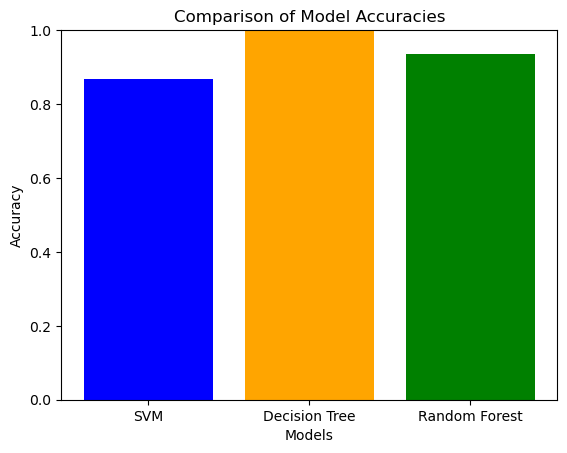

In [15]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
svm_accuracy = accuracy_score(y_test, y_pred)
dt_accuracy = accuracy_score(y_test, ts_pred_dtc)
rf_accuracy = accuracy_score(y_test, ts_pred_rfc)

# Creating a bar plot
models = ['SVM', 'Decision Tree', 'Random Forest']
accuracies = [svm_accuracy, dt_accuracy, rf_accuracy]

plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy range
plt.show()
